In [1]:
import pandas as pd
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

df_cr = pd.read_csv('data/SR-EELS-Profil_SM125_-33%/Cr_bicubic.csv')
df_fe = pd.read_csv('data/SR-EELS-Profil_SM125_-33%/Fe_bicubic.csv')

disp_lat = 0.1861361

xs = [x * disp_lat for x in range(len(df_cr))]
df_cr['X0'] = xs
df_fe['X0'] = xs

df_cr.Y0 = df_cr.Y0 / df_cr.Y0.max()
df_fe.Y0 = df_fe.Y0 / df_fe.Y0.max()

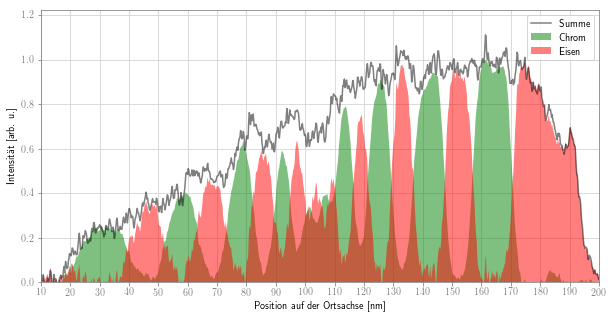

In [2]:
plt.figure(figsize=(10, 5))
plt.fill_between(df_cr.X0, df_cr.Y0, label='Chrom', color='g', lw=0, alpha=0.5)
plt.fill_between(df_fe.X0, df_fe.Y0, label='Eisen', color='r', lw=0, alpha=0.5)
plt.plot(df_cr.X0, df_cr.Y0 + df_fe.Y0, label='Summe', c='k',alpha=0.5)
plt.xlim(15, 200)
plt.xticks(range(10, 201, 10))
plt.ylim(0, 1.1 * np.max(df_cr.Y0 + df_fe.Y0))
plt.xlabel('Position auf der Ortsachse [nm]')
plt.ylabel('Intensität [arb. u.]')
plt.legend(loc='best')
plt.savefig('Bilder/SR-EELS_FeCr_SM125_-33_rot_Linescan')
plt.show()

In [3]:
norm_cs = df_cr.Y0 / df_cr.Y0.max()
norm_fe = df_fe.Y0 / df_fe.Y0.max()
ys = lambda shift: norm_cs + norm_fe.shift(shift)
# Bei einem Produkt stimmt der automatisch bestimmte Wert besser mit dem manuell bestimmten Wert überein.
prods = lambda shift: norm_cs * norm_fe.shift(shift)

shift_opt = 0
stdv_opt = prods(0).std()
for offset in range(1, 31):
    stdv = prods(offset).std()
    print(offset, stdv)
    if stdv < stdv_opt:
        shift_opt = offset
        stdv_opt = stdv
shift_opt, shift_opt * disp_lat

1 0.0612427133182
2 0.0622597230335
3 0.0640456544291
4 0.0665306409119
5 0.0696228877639
6 0.0732176641427
7 0.0772150682899
8 0.0815298226412
9 0.0860912002992
10 0.0908295771642
11 0.0956833796802
12 0.1006120652
13 0.105590846323
14 0.110586882422
15 0.115559869466
16 0.120495496627
17 0.125388112458
18 0.130222906399
19 0.134958292149
20 0.139570170964
21 0.144052294576
22 0.148413177782
23 0.15264897021
24 0.156751192382
25 0.160709620472
26 0.164520928716
27 0.168188388107
28 0.171716132693
29 0.175104268686
30 0.17834907222


(0, 0.0)

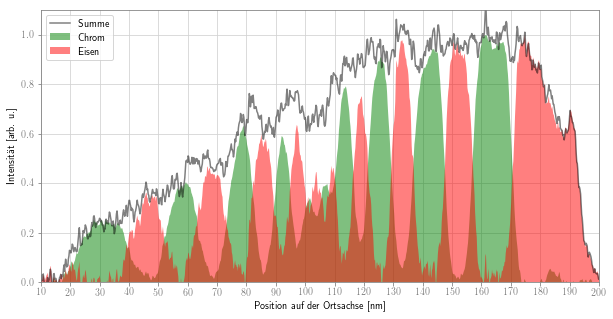

In [4]:
plt.figure(figsize=(10, 5))
plt.fill_between(df_cr.X0, df_cr.Y0, label='Chrom', color='g', lw=0, alpha=0.5)
plt.fill_between(df_fe.X0 + shift_opt * disp_lat, df_fe.Y0, label='Eisen', color='r', lw=0, alpha=0.5)
ys_raw = lambda shift: df_cr.Y0 + df_fe.Y0.shift(shift)
plt.plot(df_cr.X0, ys_raw(shift_opt), label='Summe', c='k',alpha=0.5)
plt.xlim(15, 200)
plt.xticks(range(10, 201, 10))
plt.ylim(0, 1.1 * df_cr.Y0.max())
plt.xlabel('Position auf der Ortsachse [nm]')
plt.ylabel('Intensität [arb. u.]')
plt.legend(loc='best')
plt.savefig('Bilder/SR-EELS_FeCr_SM125_-33_rot_Linescan2')
plt.show()

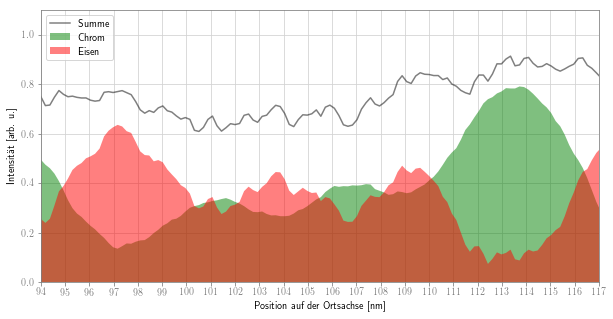

In [5]:
plt.figure(figsize=(10, 5))
plt.fill_between(df_cr.X0, df_cr.Y0, label='Chrom', color='g', lw=0, alpha=0.5)
plt.fill_between(df_fe.X0 + shift_opt * disp_lat, df_fe.Y0, label='Eisen', color='r', lw=0, alpha=0.5)
ys_raw = lambda shift: df_cr.Y0 + df_fe.Y0.shift(shift)
plt.plot(df_cr.X0, ys_raw(shift_opt), label='Summe', c='k',alpha=0.5)
plt.xlim(94, 117)
plt.xticks(range(94, 118))
plt.ylim(0, 1.1 * df_cr.Y0.max())
plt.xlabel('Position auf der Ortsachse [nm]')
plt.ylabel('Intensität [arb. u.]')
plt.legend(loc='best')
plt.savefig('Bilder/SR-EELS_FeCr_SM125_-33_rot_Linescan2_Ausschnitt')
plt.show()

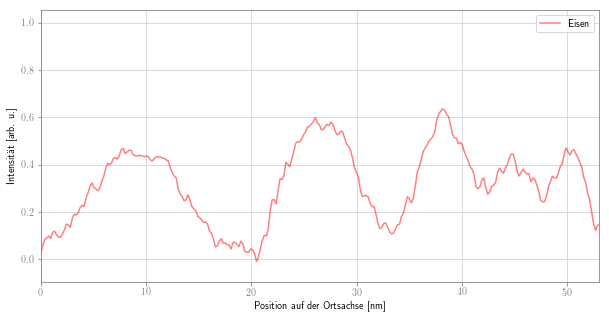

In [6]:
plt.figure(figsize=(10, 5))
#plt.fill_between(df_cr.X0 - 50, df_cr.Y0, label='Chrom', color='g', alpha=0.5)
plt.plot(df_fe.X0 + shift_opt * disp_lat - 59, df_fe.Y0, label='Eisen', color='r', alpha=0.5)
#ys_raw = lambda shift: df_cr.Y0 + df_fe.Y0.shift(shift)
#plt.plot(df_cr.X0, ys_raw(shift_opt), label='Summe', c='k',alpha=0.5)
plt.xlim(0, 53)
#plt.xticks(range(0, 46, 5))
#plt.ylim(0, 1.1 * df_cr.Y0.max())
plt.xlabel('Position auf der Ortsachse [nm]')
plt.ylabel('Intensität [arb. u.]')
plt.legend(loc='best')
#plt.savefig('Bilder/SR-EELS_FeCr_SM125_-33_rot_Linescan2_Ausschnitt_Vergleich')
plt.show()